## Icke fungerande RAÄ länkar Wikipedia -> RAÄ   
version 1.0 

* Denna [Notebook](https://github.com/salgo60/open-data-examples/blob/master/Icke%20fungerande%20RA%C3%84%20l%C3%A4nkar.ipynb)

* Larske tog fram en lista som en python snutt kollade igenom
  * Larske lista i [Quarry](https://quarry.wmflabs.org/query/46216) = 164141 länkar kulturarvsdata 
* [Python kod](https://gist.github.com/salgo60/f33116056e2698186b9ee424626246fd) som om länken skickar fel status <> 200 --> länkröta i Wikipedia och länkas skall bort 
  * Filer som inte gav [http Status 200](https://raw.githubusercontent.com/salgo60/open-data-examples/master/data/RA%C3%84files20200630.txt) = 7602 unika filnamn
* Förklaring [Abbe98 på Bybrunnen](https://sv.wikipedia.org/wiki/Wikipedia:Bybrunnen#K-sams%C3%B6k_anv%C3%A4nds_det?_N%C3%A5gon_som_lyckats_felrapportera) som kan ge ledtråd vad som skall städas eller ej  
  * svårt att förstå om/vad RAÄ gör
  * RAÄ feedback [Wikipedia vissa delar fixade](https://sv.wikipedia.org/wiki/Malldiskussion:BBR-l%C3%A4nk#BeBR_410-poster_tillbaka)
  * [GIST](https://gist.github.com/salgo60/f33116056e2698186b9ee424626246fd)

In [10]:
import urllib3, json  
import pandas as pd
nonWorkingfiles = "https://raw.githubusercontent.com/salgo60/open-data-examples/master/data/RA%C3%84files20200630.txt"
 
http = urllib3.PoolManager()
r1 = http.request('GET', nonWorkingfiles) 
files = r1.data.decode('utf-8').split("\n")   
print(len(files))

7602


In [11]:
df=pd.DataFrame(files,columns=["Line"])  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7602 entries, 0 to 7601
Data columns (total 1 columns):
Line    7602 non-null object
dtypes: object(1)
memory usage: 59.5+ KB


In [12]:
pd.set_option("display.max.rows", None)   
pd.set_option("display.max.columns", None) 

In [13]:
dfsplit = df.Line.str.split("\t",n=0,expand = True)


In [14]:
dfsplit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7602 entries, 0 to 7601
Data columns (total 2 columns):
0    7602 non-null object
1    7602 non-null object
dtypes: object(2)
memory usage: 118.9+ KB


In [15]:
dfsplit.head()

0                                                  1
0  Status:  410     http://kulturarvsdata.se/BHM/media/html/BM_UM...
1  Status:  410     http://kulturarvsdata.se/BHM/media/html/BM_UM...
2  Status:  410     http://kulturarvsdata.se/BHM/media/html/BM_UM...
3  Status:  410     http://kulturarvsdata.se/BHM/media/html/BM_UM...
4  Status:  410     http://kulturarvsdata.se/BHM/media/html/BM_UM...

In [16]:
dfsplit[0].value_counts()

Status:  410      7479
Status:  404       122
Status:  400         1
Name: 0, dtype: int64

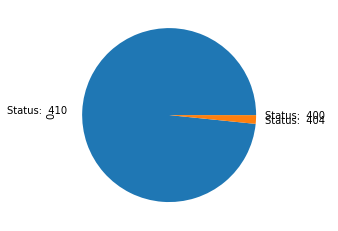

In [17]:
%matplotlib inline  
import matplotlib.pyplot as plt 
dfsplit[0].value_counts().plot.pie()
plt.show()

Enligt Bybrunnen Abbe98 finns det en logik i felen och tolkas enligt nedan
* 410 = 7479 poster skall tolkas som borttagen är att RAÄ har problem med upphovsrätt
* 404 = 122 poster finns inte  
* 400 = 1 ???   

Normal tolkning 

404: ”Den begärda resursen hittades inte.” Det vanligaste felmeddelandet av dem alla. Denna kod betyder att den begärda resursen inte existerar och att servern inte vet om den någonsin existerade.

410: ”Den begärda resursen är borta och kommer inte att komma tillbaka.” Liknande en 404 ”sidan finns inte” -kod, förutom att en 410 indikerar att tillståndet är förväntat och permanent.


In [164]:
dfStatus410Flag = dfsplit[0].str.strip() == "Status:  410" 
dfStatus410 =  dfsplit[dfStatus410Flag]  
dfStatus410.info()   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7479 entries, 0 to 7599
Data columns (total 3 columns):
0    7479 non-null object
1    7479 non-null object
3    7479 non-null object
dtypes: object(3)
memory usage: 233.7+ KB


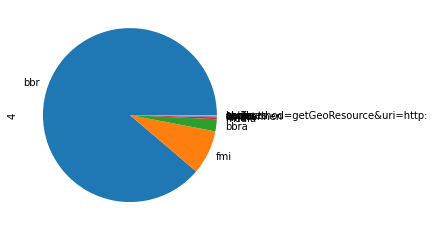

In [96]:
dfsplit[4].value_counts().plot.pie()
plt.show()

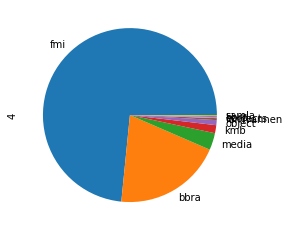

In [99]:
dfsplit[4].value_counts()[1:10].plot.pie()
plt.show()

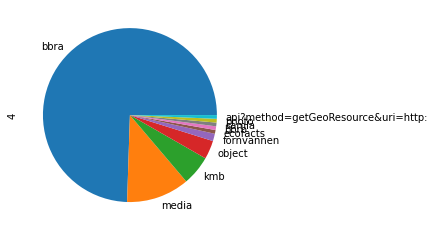

In [100]:
dfsplit[4].value_counts()[2:].plot.pie()
plt.show()